In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
        
#if an error is experienced, skip the city.        
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aklavik
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | guamuchil
Processing Record 4 of Set 1 | kupang
Processing Record 5 of Set 1 | verkhniy avzyan
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | kavaratti
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | yelkhovka
Processing Record 11 of Set 1 | russell
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | coolum beach
Processing Record 17 of Set 1 | kalmunai
Processing Record 18 of Set 1 | larap
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | nanortalik
Processing Record 23 of Set 1 | chuy


Processing Record 40 of Set 4 | yumen
Processing Record 41 of Set 4 | taoudenni
Processing Record 42 of Set 4 | huilong
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | coahuayana
Processing Record 45 of Set 4 | poum
Processing Record 46 of Set 4 | varhaug
Processing Record 47 of Set 4 | bilibino
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | luganville
Processing Record 50 of Set 4 | rungata
City not found. Skipping...
Processing Record 1 of Set 5 | cape town
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | basoko
Processing Record 4 of Set 5 | luba
Processing Record 5 of Set 5 | lazaro cardenas
Processing Record 6 of Set 5 | egvekinot
Processing Record 7 of Set 5 | la rioja
Processing Record 8 of Set 5 | bambous virieux
Processing Record 9 of Set 5 | cockburn town
Processing Record 10 of Set 5 | sao felix do xingu
Processing Record 11 of Set 5 | dubbo
Processing Record 12 of Set 5 | sentyabrskiy
City not f

Processing Record 30 of Set 8 | katherine
Processing Record 31 of Set 8 | makir
Processing Record 32 of Set 8 | biak
Processing Record 33 of Set 8 | port hardy
Processing Record 34 of Set 8 | port macquarie
Processing Record 35 of Set 8 | halalo
City not found. Skipping...
Processing Record 36 of Set 8 | eyl
Processing Record 37 of Set 8 | san luis rio colorado
Processing Record 38 of Set 8 | alofi
Processing Record 39 of Set 8 | camoapa
Processing Record 40 of Set 8 | skjervoy
Processing Record 41 of Set 8 | kruisfontein
Processing Record 42 of Set 8 | marcona
City not found. Skipping...
Processing Record 43 of Set 8 | northam
Processing Record 44 of Set 8 | homer
Processing Record 45 of Set 8 | talara
Processing Record 46 of Set 8 | le mars
Processing Record 47 of Set 8 | plouzane
Processing Record 48 of Set 8 | ribeira grande
Processing Record 49 of Set 8 | dingle
Processing Record 50 of Set 8 | shizunai
Processing Record 1 of Set 9 | aloleng
Processing Record 2 of Set 9 | burica
Ci

Processing Record 17 of Set 12 | caninde
Processing Record 18 of Set 12 | yaan
Processing Record 19 of Set 12 | matagami
Processing Record 20 of Set 12 | manggar
Processing Record 21 of Set 12 | krasnoarmeysk
Processing Record 22 of Set 12 | mountain home
Processing Record 23 of Set 12 | hobyo
Processing Record 24 of Set 12 | shahpur
Processing Record 25 of Set 12 | tokmak
Processing Record 26 of Set 12 | mayumba
Processing Record 27 of Set 12 | khani
Processing Record 28 of Set 12 | ndele
Processing Record 29 of Set 12 | rexburg
Processing Record 30 of Set 12 | durham
Processing Record 31 of Set 12 | thinadhoo
Processing Record 32 of Set 12 | nicoya
Processing Record 33 of Set 12 | santa isabel do rio negro
Processing Record 34 of Set 12 | dolores
Processing Record 35 of Set 12 | honningsvag
Processing Record 36 of Set 12 | carutapera
Processing Record 37 of Set 12 | concepcion
Processing Record 38 of Set 12 | tiznit
Processing Record 39 of Set 12 | half moon bay
Processing Record 40 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aklavik,68.2191,-135.0107,55.83,41,100,21.09,CA,2022-08-10 00:24:22
1,Upernavik,72.7868,-56.1549,40.64,93,100,17.98,GL,2022-08-10 00:26:05
2,Guamuchil,25.4667,-108.1000,91.35,54,86,4.52,MX,2022-08-10 00:26:05
3,Kupang,-10.1667,123.5833,80.80,69,19,11.07,ID,2022-08-10 00:26:05
4,Verkhniy Avzyan,53.5289,57.5372,56.84,92,46,1.92,RU,2022-08-10 00:26:06
5,Sitka,57.0531,-135.3300,62.49,59,100,11.50,US,2022-08-10 00:26:06
6,Kavaratti,10.5669,72.6420,80.47,83,90,19.17,IN,2022-08-10 00:26:07
7,Hithadhoo,-0.6000,73.0833,81.43,77,75,7.20,MV,2022-08-10 00:24:25
8,Lavrentiya,65.5833,-171.0000,51.78,54,85,13.71,RU,2022-08-10 00:26:07
9,Yelkhovka,53.8667,50.2832,68.76,70,32,2.26,RU,2022-08-10 00:26:07


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aklavik,CA,2022-08-10 00:24:22,68.2191,-135.0107,55.83,41,100,21.09
1,Upernavik,GL,2022-08-10 00:26:05,72.7868,-56.1549,40.64,93,100,17.98
2,Guamuchil,MX,2022-08-10 00:26:05,25.4667,-108.1000,91.35,54,86,4.52
3,Kupang,ID,2022-08-10 00:26:05,-10.1667,123.5833,80.80,69,19,11.07
4,Verkhniy Avzyan,RU,2022-08-10 00:26:06,53.5289,57.5372,56.84,92,46,1.92
5,Sitka,US,2022-08-10 00:26:06,57.0531,-135.3300,62.49,59,100,11.50
6,Kavaratti,IN,2022-08-10 00:26:07,10.5669,72.6420,80.47,83,90,19.17
7,Hithadhoo,MV,2022-08-10 00:24:25,-0.6000,73.0833,81.43,77,75,7.20
8,Lavrentiya,RU,2022-08-10 00:26:07,65.5833,-171.0000,51.78,54,85,13.71
9,Yelkhovka,RU,2022-08-10 00:26:07,53.8667,50.2832,68.76,70,32,2.26


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

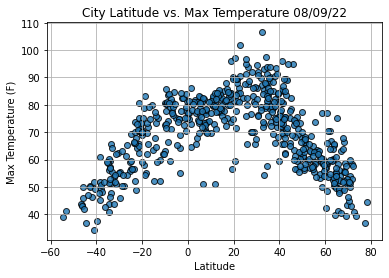

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

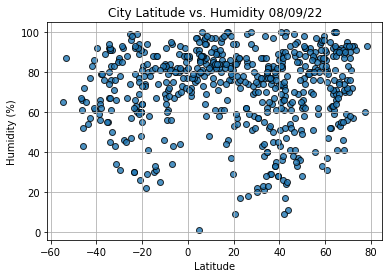

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

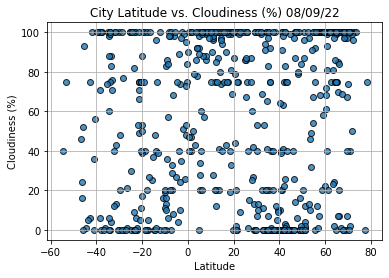

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

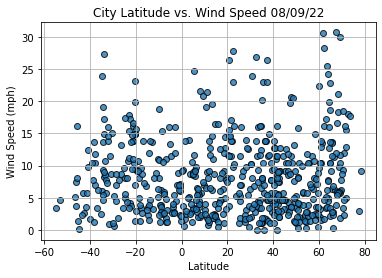

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2022-08-10 00:26:09
Lat                      -42.8794
Lng                      147.3294
Max Temp                    50.25
Humidity                       77
Cloudiness                     75
Wind Speed                   5.75
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
575     True
576     True
577     True
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aklavik,CA,2022-08-10 00:24:22,68.2191,-135.0107,55.83,41,100,21.09
1,Upernavik,GL,2022-08-10 00:26:05,72.7868,-56.1549,40.64,93,100,17.98
2,Guamuchil,MX,2022-08-10 00:26:05,25.4667,-108.1000,91.35,54,86,4.52
4,Verkhniy Avzyan,RU,2022-08-10 00:26:06,53.5289,57.5372,56.84,92,46,1.92
5,Sitka,US,2022-08-10 00:26:06,57.0531,-135.3300,62.49,59,100,11.50


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

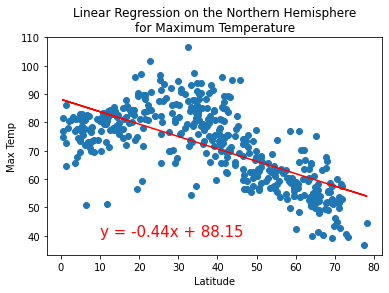

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' "\n"
                       'for Maximum Temperature', 'Max Temp',(10,40))

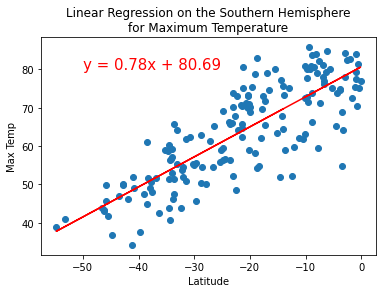

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' "\n"
                        'for Maximum Temperature', 'Max Temp',(-50,80))

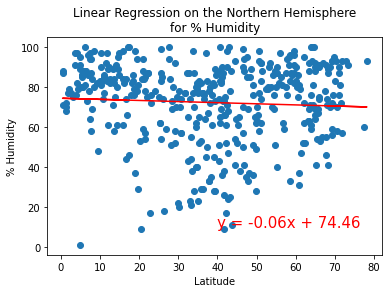

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' "\n"
                        'for % Humidity', '% Humidity',(40,10))

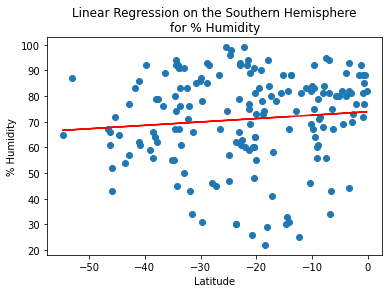

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' "\n"
                        'for % Humidity', '% Humidity',(-50,15))

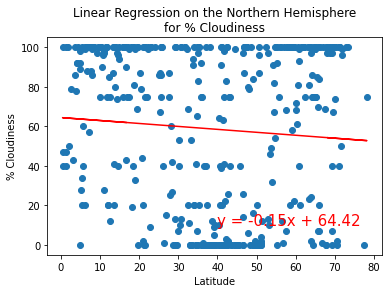

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' "\n"
                        'for % Cloudiness', '% Cloudiness',(40,10))

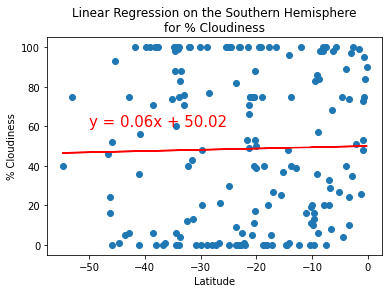

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' "\n"
                        'for % Cloudiness', '% Cloudiness',(-50,60))

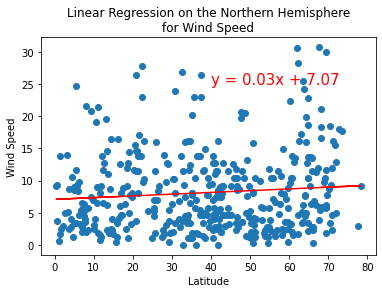

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere' "\n"
                        'for Wind Speed', 'Wind Speed',(40,25))

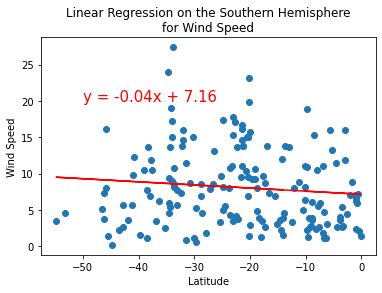

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere' "\n"
                        'for Wind Speed', 'Wind Speed',(-50,20))